In [7]:
#Standard Libraries for visualization and data wrangling 

import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')

#Logistic Regression Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
#Data Collection

train = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv')
train

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


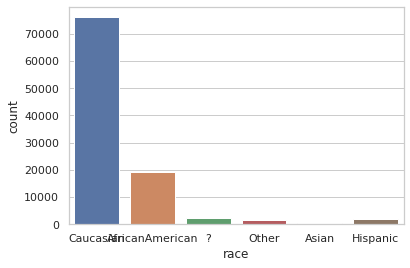

In [9]:
sns.countplot(x='race', data=train)

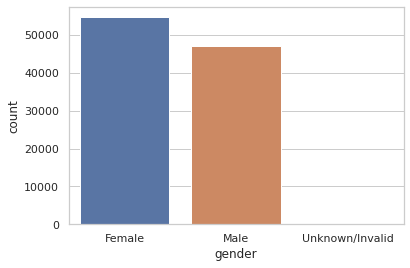

In [10]:
sns.countplot(x='gender', data=train)

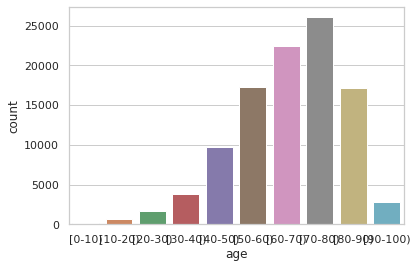

In [11]:
sns.countplot(x='age', data=train)

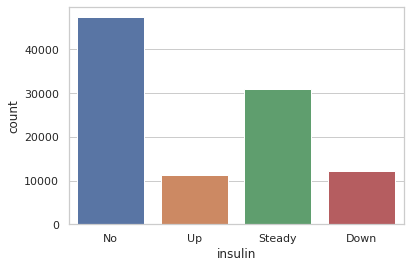

In [12]:
sns.countplot(x='insulin', data=train)
#Insulin is one of the few medicines prescribed to the patients that had a range of 'up', 'steady', and 'down' values.

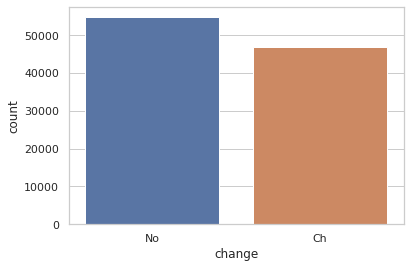

In [13]:
sns.countplot(x='change', data=train)

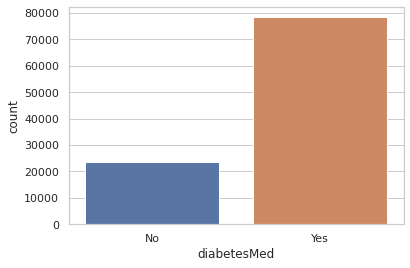

In [14]:
sns.countplot(x='diabetesMed', data=train)

### Data Cleaning and Data Pre - Processing

So I wanted to focus on race, gender, age, insulin, change in medicine, and diabetes medicine on this project.

In [15]:
train = train.drop(['encounter_id','patient_nbr','weight','admission_type_id',
            'discharge_disposition_id','admission_source_id','payer_code',
            'medical_specialty','diag_1','diag_2','diag_3'], axis = 1) 

In [16]:
train = train.drop(['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
            'number_outpatient','number_emergency','number_inpatient', 'number_diagnoses'], axis = 1) 

In [17]:
train = train.drop(['metformin', 'repaglinide',	'nateglinide',	'chlorpropamide',	'glimepiride',	'acetohexamide',
            'glipizide',	'glyburide',	'tolbutamide',	'pioglitazone',	'rosiglitazone',	'acarbose',	
            'miglitol',	'troglitazone',	'tolazamide',	'examide',	'citoglipton'], axis=1)

In [18]:
train =  train.drop(['glyburide-metformin',	'glipizide-metformin',	'glimepiride-pioglitazone',	
                     'metformin-rosiglitazone',	'metformin-pioglitazone', 'max_glu_serum',	'A1Cresult'], axis=1)

In [19]:
train

,race,gender,age,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),No,No,No,NO
1,Caucasian,Female,[10-20),Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),No,No,Yes,NO
3,Caucasian,Male,[30-40),Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),Down,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),Steady,No,Yes,NO
101763,Caucasian,Male,[70-80),Down,Ch,Yes,NO
101764,Caucasian,Female,[80-90),Up,Ch,Yes,NO


In [20]:
train.isnull().sum().sum()

0

In [21]:
df = train

In [22]:
df['race'] = df.race.map({'Caucasian': 0, 'AfricanAmerican':1, 'Hispanic':2, 'Asian':3, 'Other':4, '?':4})
df['gender'] = df.gender.map({'Unknown/Invalid':0, 'Female': 1, 'Male':2, })
df['age'] = df.age.map({'[0-10)': 0, '[10-20)':1, '[20-30)':2, '[30-40)':3, '[40-50)':4, 
                        '[50-60)':5, '[60-70)':6, '[70-80)':7, '[80-90)':8, '[90-100)':9})
df['insulin'] = df.insulin.map({'No': 0, 'Down':1, 'Steady':2, 'Up':3})
df['change'] = df.change.map({'No':0,'Ch':1})
df['diabetesMed'] = df.diabetesMed.map({'No':0,'Yes':1})
df['readmitted'] = df.readmitted.map({'NO':0,'<30':1,'>30':2})

In [23]:
df

,race,gender,age,insulin,change,diabetesMed,readmitted
0,0,1,0,0,0,0,0
1,0,1,1,3,1,1,2
2,1,1,2,0,0,1,0
3,0,2,3,3,1,1,0
4,0,2,4,2,1,1,0
...,...,...,...,...,...,...,...
101761,1,2,7,1,1,1,2
101762,1,1,8,2,0,1,0
101763,0,2,7,1,1,1,0
101764,0,1,8,3,1,1,0


### Building Logistic Regression Model

In [24]:
df1 = df

In [25]:
y = df1['readmitted']
X = df1[['race', 'gender', 'age', 'insulin', 'change', 'diabetesMed']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = logmodel.predict(X_test)

### And finally... The Classification Report

In [31]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      8266
           1       0.00      0.00      0.00      1689
           2       0.00      0.00      0.00      5310

    accuracy                           0.54     15265
   macro avg       0.18      0.33      0.23     15265
weighted avg       0.29      0.54      0.38     15265



[[8266    0    0]
 [1689    0    0]
 [5310    0    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# To recap,
#   0 represents No readmittance,
#   1 represents less than 30 days readmittance, and
#   2 represents more than 30 days readmittance.

# Precision is the accuracy of positive predictions. 
# Precision = TP/(TP + FP)
# Recall is the ratio of positives that were correctly identified.
# Recall = TP/(TP + FN)

# No readmittance has 54% precision and 100% recall.
# I would consider this low precision and high recall.
# This means my system returns many results, but most of its predicted labels are incorrect when compared to the training labels.